<a href="https://colab.research.google.com/github/AkshayK2026/Machine_Learning/blob/main/Patato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [ ]:
img_size=256
batch_size=32
EPOCH=20

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage',
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size=batch_size
)

Found 2224 files belonging to 3 classes.


In [ ]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

70

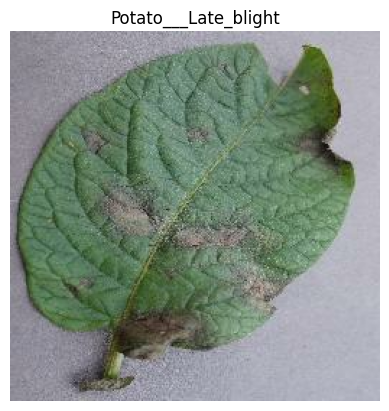

In [ ]:
for images, labels in dataset.take(1):
    # Show the first image in the batch
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(dataset.class_names[labels[0]])
    plt.show()


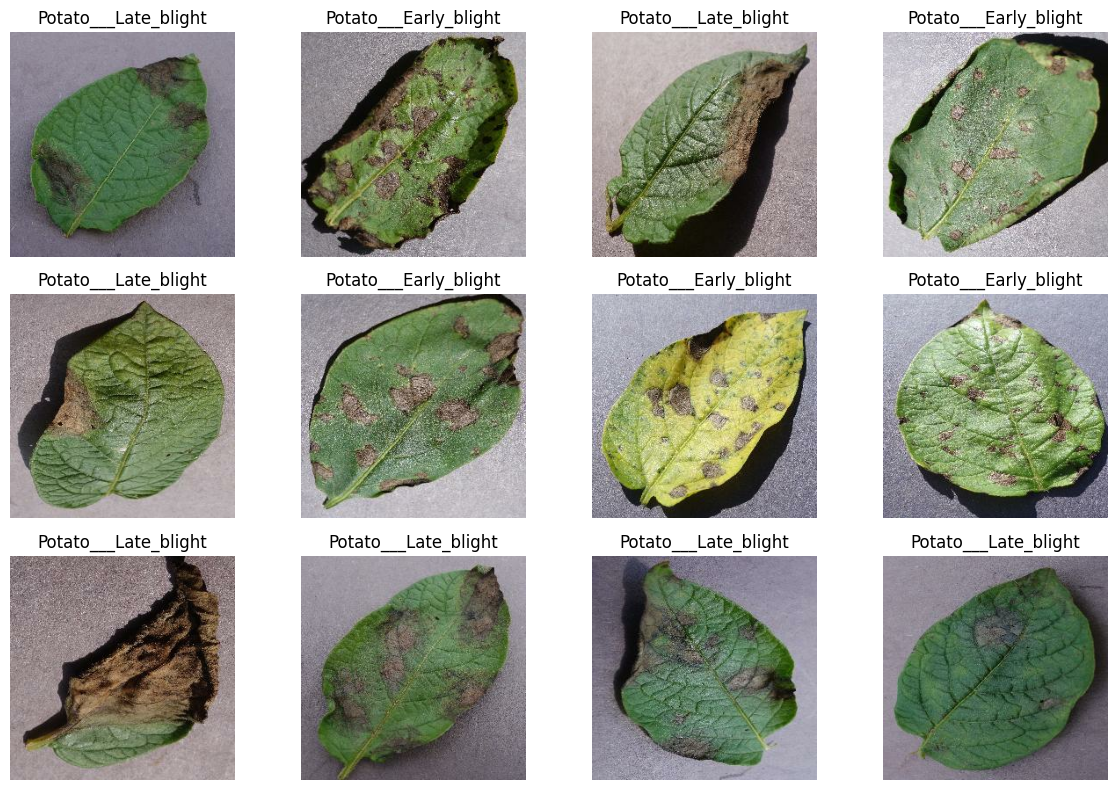

In [ ]:
for images, labels in dataset.take(1):
    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    for i in range(12):  # Show 12 images
        ax = plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[labels[i].numpy()])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
traning_size=.80
len(dataset)*traning_size


56.0

In [ ]:
traning_ds=dataset.take(56)
print(len(traning_ds))

56


In [ ]:
#validation dataset
test_ds=dataset.skip(56)
print(len(test_ds))

14


In [ ]:
len(dataset)*.10

7.0

In [ ]:
val_ds=test_ds.take(7)
print(len(val_ds))

7


In [ ]:
test_ds=test_ds.skip(7)
print(len(test_ds))

7


In [ ]:
import tensorflow as tf

def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    # Get the dataset size
    ds_size = tf.data.experimental.cardinality(ds).numpy()

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    # Partition the dataset
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)


In [ ]:
len(train_ds)
# len(val_ds)
# len(test_ds)

56

In [ ]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential([
    Resizing(img_size, img_size),
    Rescaling(1.0 / 255)
])


In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
CHANNELS = 3


In [ ]:
##Building the model
input_shape=(batch_size,img_size,img_size,CHANNELS)
n_classes=3
model=models.Sequential([
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax')
 ])
model.build(input_shape=input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9270 - loss: 0.1993 - val_accuracy: 0.9598 - val_loss: 0.1118
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - accuracy: 0.9304 - loss: 0.1754 - val_accuracy: 0.9286 - val_loss: 0.1538
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.9461 - loss: 0.1360 - val_accuracy: 0.9732 - val_loss: 0.1002
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.9620 - loss: 0.1074 - val_accuracy: 0.8884 - val_loss: 0.2736
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.9455 - loss: 0.1358 - val_accuracy: 0.9821 - val_loss: 0.0631
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.9684 - loss: 0.0724 - val_accuracy: 0.9688 - val_loss: 0.0861
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 237s 4s/step - accuracy: 0.9717 - loss: 0.0944 - val_accuracy: 0.9732 - val_loss: 0.0786
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9625 - loss: 0.1049 - val_accuracy: 0.9777 - v

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 56}

In [ ]:
score

NameError: name 'score' is not defined

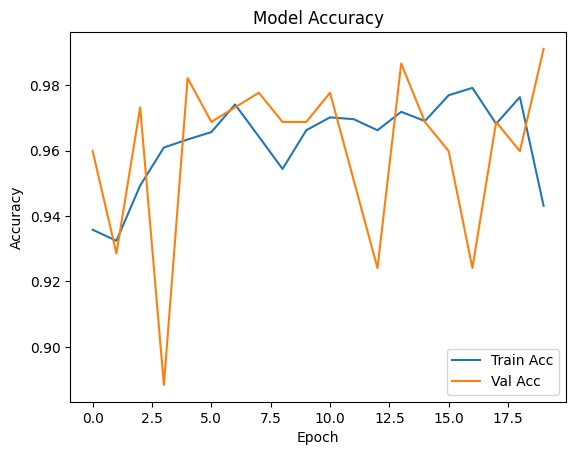

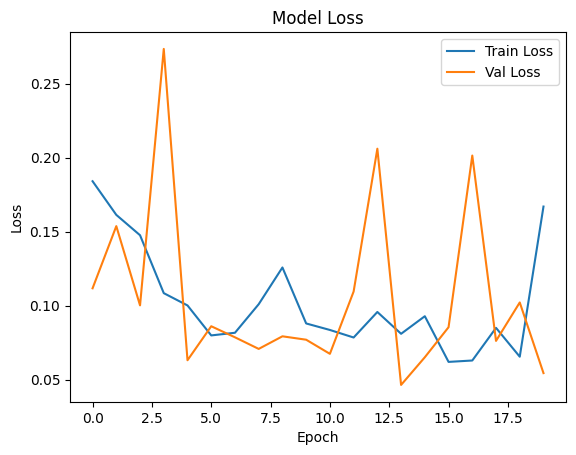

In [ ]:
# After model.fit()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


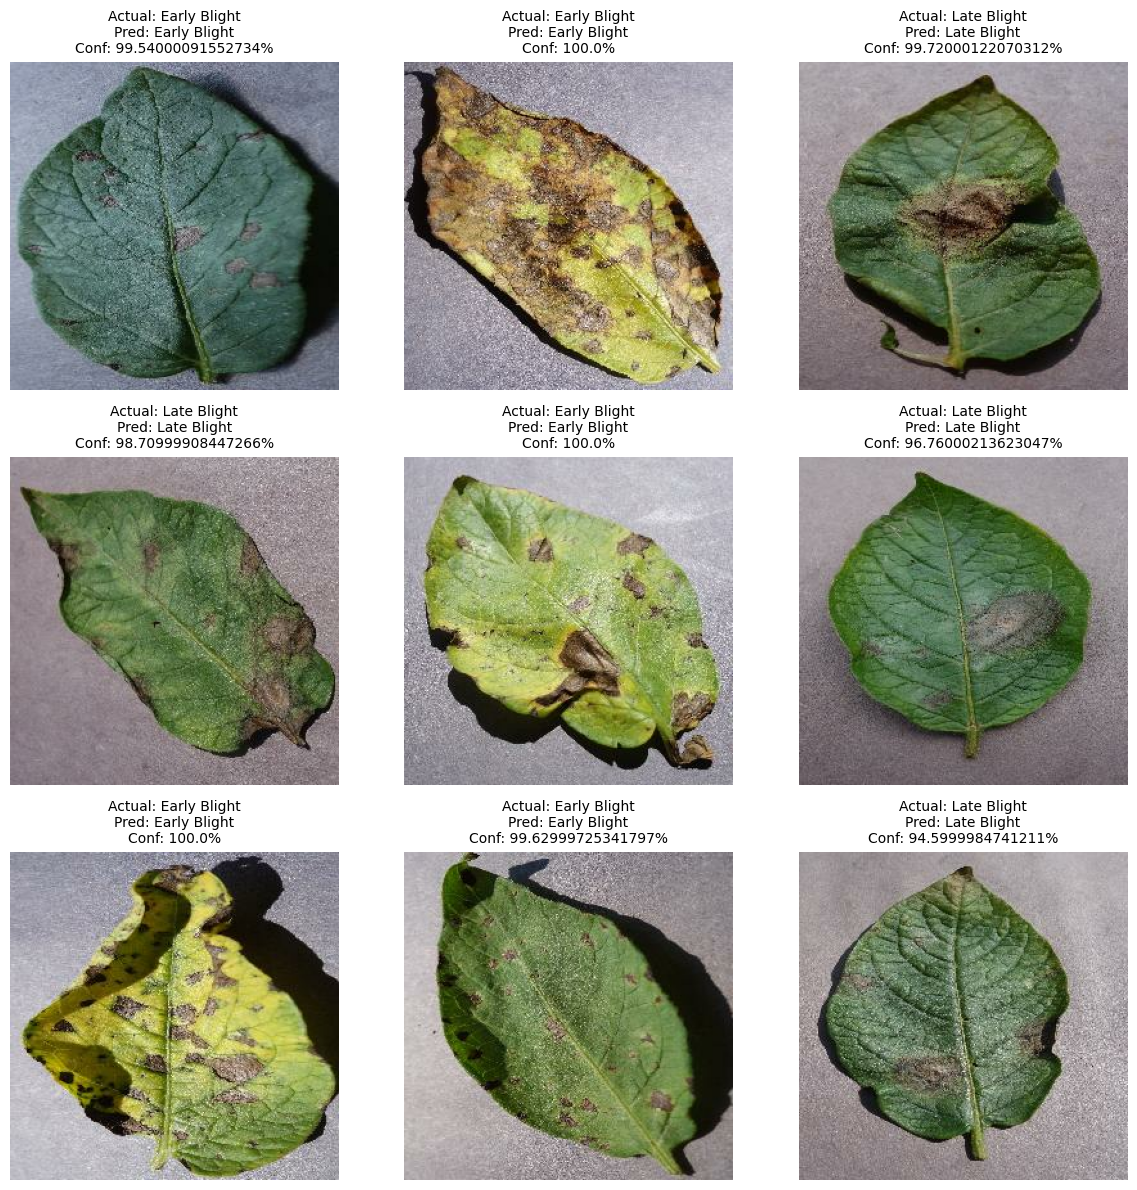

In [ ]:
class_names = ['Early Blight', 'Late Blight', 'Healthy']

plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")
        label = labels[i].numpy()

        predicted_class, confidence = predict(model, img)
        actual_class = class_names[label]

        plt.imshow(img)
        ax.set_title(f"Actual: {actual_class}\nPred: {predicted_class}\nConf: {confidence}%", fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()



In [ ]:
model.save("/content/drive/MyDrive/potato_disease_model.h5")


NameError: name 'model' is not defined

In [ ]:
model.save('model.h5')  # Then use 'model.h5' for download


NameError: name 'model' is not defined